#### 0. Exploring the data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [34]:
RANDOM_STATE = 42
df = pd.read_csv("./datasource/accident_2022.csv")

In [35]:
df.describe()

,CASENUM,PSU,PSU_VAR,PSUSTRAT,REGION,URBANICITY,STRATUM,PJ,WEIGHT,PEDS,...,WEATHER,WEATHR_IM,SCH_BUS,INT_HWY,MAX_SEV,MAXSEV_IM,NUM_INJ,NO_INJ_IM,ALCOHOL,ALCHL_IM
count,5.395500e+04,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,...,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.00000
mean,2.022043e+11,48.251469,50.984784,12.431508,2.719563,1.243369,7.217570,2373.481234,109.915598,0.096747,...,5.333667,2.360152,0.005375,0.097044,1.121286,0.977537,2.554629,0.747289,4.732685,1.92794
std,2.675263e+05,19.996177,29.120100,6.155197,0.877424,0.429120,2.591102,1677.740590,65.879439,0.311848,...,16.883464,3.059557,0.073117,0.304903,1.574404,1.164642,13.258251,0.970859,3.473328,0.25859
min,2.022037e+11,10.000000,10.000000,1.000000,1.000000,1.000000,2.000000,45.000000,8.770366,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,2.022040e+11,32.000000,32.000000,8.000000,2.000000,1.000000,6.000000,573.000000,47.501682,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000
50%,2.022043e+11,48.000000,48.000000,12.000000,3.000000,1.000000,8.000000,1800.000000,121.498316,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000
75%,2.022045e+11,65.000000,67.000000,16.000000,3.000000,1.000000,9.000000,4142.000000,145.062232,0.000000,...,2.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,9.000000,2.00000
max,2.022048e+11,83.000000,214.000000,25.000000,4.000000,2.000000,10.000000,4154.000000,520.822735,5.000000,...,99.000000,12.000000,1.000000,9.000000,9.000000,8.000000,99.000000,14.000000,9.000000,2.00000


In [36]:
df.columns

Index(['CASENUM', 'PSU', 'PSU_VAR', 'PSUSTRAT', 'REGION', 'REGIONNAME',
       'URBANICITY', 'URBANICITYNAME', 'STRATUM', 'STRATUMNAME', 'PJ',
       'WEIGHT', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PERMVIT', 'MONTH', 'MONTHNAME', 'DAY_WEEK', 'DAY_WEEKNAME', 'WKDY_IM',
       'WKDY_IMNAME', 'YEAR', 'YEARNAME', 'HOUR', 'HOURNAME', 'HOUR_IM',
       'HOUR_IMNAME', 'MINUTE', 'MINUTENAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'HARM_EV', 'HARM_EVNAME', 'EVENT1_IM', 'EVENT1_IMNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'MANCOL_IM', 'MANCOL_IMNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2', 'RELJCT2NAME', 'RELJCT2_IM',
       'RELJCT2_IMNAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'LGTCON_IM',
       'LGTCON_IMNAME', 'WEATHER', 'WEATHERNAME', 'WEATHR_IM', 'WEATHR_IMNAME',
       'SCH_BUS', 'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'MAX_SEV',
       'MAX_SEVN

In [ ]:
#dropping identifier columns
columns_to_keep = [
    'MONTH', 'DAY_WEEK', 'HOUR',
    'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
    'TYP_INT', 'REL_ROAD', 'WRK_ZONE',
    'LGT_COND', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'ALCOHOL', 'MAX_SEV'
]

df = df[columns_to_keep]

In [38]:
df['MAX_SEV'].value_counts(normalize=True)

MAX_SEV
0    0.481160
1    0.206061
2    0.161301
3    0.107238
4    0.023798
9    0.018071
5    0.001928
8    0.000389
6    0.000056
Name: proportion, dtype: float64

In [39]:
#dropping unlabeled data
df = df[df['MAX_SEV'] <= 4]
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
count,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852
unique,12,7,25,55,11,4,15,11,13,5,9,13,2,3,4,5
top,10,6,17,12,0,0,1,1,1,0,1,1,0,0,2,0
freq,4905,8871,4297,35136,17521,48795,21510,28093,42920,51985,35833,39284,52564,47694,29660,25961


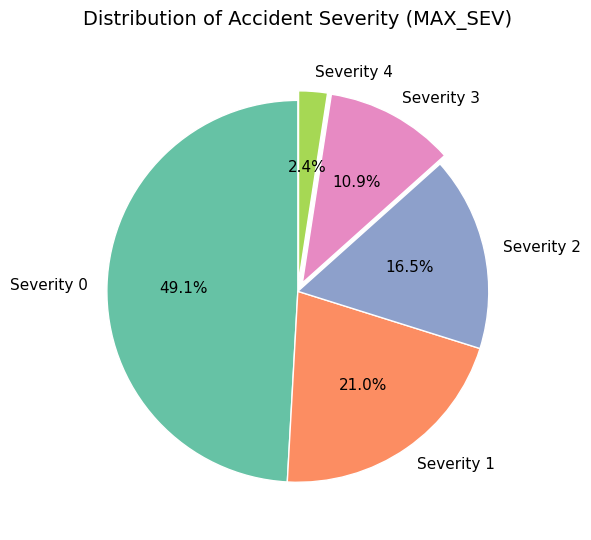

In [40]:
# Prepare data
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]

# Use a distinct color palette
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


The dataset is highly imbalanced — if we predict class 0 (no injury) for all data points, we still achieve around 50% accuracy. However, the proportion of serious injury and fatal accidents is extremely low, which causes the model to become biased toward the majority class.

To address this issue, we obtained the Accidents dataset for 2016-2021 from the same source and combined it with the main dataset. This helps increase the representation of high-severity cases, providing a more balanced dataset and improving the model’s ability to detect severe accidents.

In [41]:
#combine 2 data
# === Load additional data ===
df_2020 = pd.read_csv("./datasource/accident_2020.csv")
df_2021 = pd.read_csv("./datasource/accident_2021.csv")
df_2019 = pd.read_csv("./datasource/accident_2019.csv")
df_2018 = pd.read_csv("./datasource/accident_2018.csv")
df_2017 = pd.read_csv("./datasource/accident_2017.csv")
df_2016 = pd.read_csv("./datasource/accident_2016.csv")


df_2016 = df_2016[columns_to_keep]
df_2017 = df_2017[columns_to_keep]
df_2018 = df_2018[columns_to_keep]
df_2019 = df_2019[columns_to_keep]
df_2020 = df_2020[columns_to_keep]
df_2021 = df_2021[columns_to_keep]
df_extra = pd.concat([
    df_2020[df_2020['MAX_SEV'].isin([0,1,2,3,4])],
    df_2021[df_2021['MAX_SEV'].isin([0,1,2,3,4])],
    df_2019[df_2019['MAX_SEV'].isin([0,1,2,3,4])],
    df_2018[df_2018['MAX_SEV'].isin([0,1,2,3,4])],
    df_2017[df_2017['MAX_SEV'].isin([0,1,2,3,4])],
    df_2016[df_2016['MAX_SEV'].isin([0,1,2,3,4])]
], ignore_index=True)

# === Combine with 2022 dataset ===
df= pd.concat([df, df_extra], ignore_index=True)

# === Drop unlabel data ===
df = df[df['MAX_SEV'] <= 4]
# === Show new distribution ===
print("✅ Combined dataset shape:", df.shape)
print("\nProportion of severity levels:")
print(df['MAX_SEV'].value_counts(normalize=True) * 100)


/var/folders/83/lj7q7r3n2378j68znzw3f4hc0000gp/T/ipykernel_1446/2730437938.py:5: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv("./datasource/accident_2019.csv")


✅ Combined dataset shape: (359190, 16)

Proportion of severity levels:
MAX_SEV
0    48.185640
1    22.772070
2    16.254350
3    10.676522
4     2.111417
Name: proportion, dtype: float64


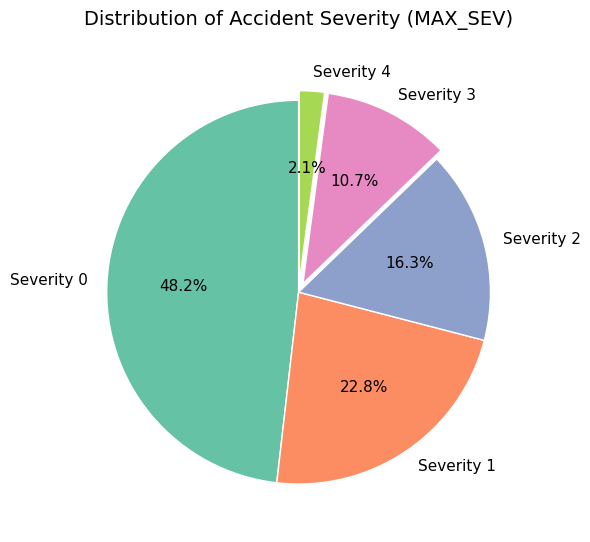

In [42]:
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [43]:
df.head(5)

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
0,1,7,9,12,2,0,1,1,1,0,1,2,0,0,9,4
1,1,7,21,42,0,0,1,1,4,0,2,2,0,1,2,2
2,1,1,5,12,1,0,1,1,1,0,3,2,0,0,2,0
3,1,7,22,12,1,0,1,1,1,0,3,2,0,0,9,0
4,1,1,2,24,0,1,19,1,4,0,3,99,0,0,1,1


| **Column**   | **Definition**                                                                                                   |
| ------------ | ------------------------------------------------------------------------------------------------------------------------ |
| **MONTH**    | Month of crash (1 = January, …, 12 = December).                                                                          |
| **DAY_WEEK** | Day of week of crash (1 = Sunday, …, 7 = Saturday).                                                                      |
| **HOUR**     | Hour of crash (0–23, based on 24-hour clock).                                                                            |
| **HARM_EV**  | First harmful event — the first injury-producing event in the crash (e.g., collision with vehicle, object, or overturn). |
| **MAN_COLL** | Manner of collision — how the vehicles collided (e.g., angle, head-on, sideswipe).                                       |
| **RELJCT1**  | Relation to junction — whether the crash occurred at or near an intersection.                                            |
| **RELJCT2**  | Relation to junction detail — secondary relation to specific junction features (e.g., ramp, merge area).                 |
| **TYP_INT**  | Type of intersection (e.g., 4-way, T-intersection, roundabout).                                                          |
| **REL_ROAD** | Relation to roadway — location of crash relative to the roadway (e.g., on road, shoulder, median, roadside).             |
| **WRK_ZONE** | Indicates if the crash occurred in or near a work zone.                                                                  |
| **LGT_COND** | Lighting condition at the time of crash (e.g., daylight, dark-lighted, dark-unlighted).                                  |
| **WEATHER**  | Atmospheric conditions during crash (e.g., clear, rain, snow, fog).                                                      |
| **SCH_BUS**  | School bus involvement (0 = none, 1 = directly involved, 2 = indirectly).                                                |
| **INT_HWY**  | Whether the crash occurred on or was related to an interstate highway.                                                   |
| **ALCOHOL**  | Indicates whether alcohol was a contributing factor (derived from driver or crash data).                                 |
| **MAX_SEV**  | Maximum severity of injury in the crash (0 = no injury, 4 = fatal).                                                      |


In [44]:
#check for missing/unknown value
UNKNOWN_MAP = {
    "HOUR":      {99},
    "WEATHER":   {9},           
    "LGT_COND":  {8, 9},         
    "SCH_BUS":   {9},
    "INT_HWY":   {9},
    "ALCOHOL":   {8,9},
    "MAN_COLL":  {98, 99},      
    "HARM_EV":   {98, 99},
    "RELJCT1":   {8, 9},
    "RELJCT2":   {98, 99},
    "TYP_INT":   {98, 99},
    "REL_ROAD":  {98,99},
    "WRK_ZONE":  {4},
}
rows = []
n = len(df)
for col in df.columns:
    codes = UNKNOWN_MAP.get(col, set())
    if len(codes) == 0:
        unk_count = 0
    else:
        unk_count = df[col].isin(codes).sum()
    rows.append({
        "column": col,
        "unknown_codes": sorted(codes),
        "unknown_count": int(unk_count),
        "unknown_percent": round(100 * unk_count / n, 3) if n else 0.0
    })
unknown_summary = pd.DataFrame(rows).sort_values("unknown_percent", ascending=False)
print(unknown_summary)
df_clean = df.copy()
for col, codes in UNKNOWN_MAP.items():
    if codes:
        df_clean.loc[df_clean[col].isin(codes), col] = np.nan

      column unknown_codes  unknown_count  unknown_percent
14   ALCOHOL        [8, 9]          96653           26.909
5    RELJCT1        [8, 9]          64926           18.076
7    TYP_INT      [98, 99]          30804            8.576
6    RELJCT2      [98, 99]          19298            5.373
9   WRK_ZONE           [4]           2647            0.737
10  LGT_COND        [8, 9]           1754            0.488
2       HOUR          [99]           1237            0.344
4   MAN_COLL      [98, 99]           1138            0.317
3    HARM_EV      [98, 99]            216            0.060
8   REL_ROAD      [98, 99]            174            0.048
13   INT_HWY           [9]             28            0.008
0      MONTH            []              0            0.000
1   DAY_WEEK            []              0            0.000
11   WEATHER           [9]              0            0.000
12   SCH_BUS           [9]              0            0.000
15   MAX_SEV            []              0            0.0

In [45]:
import pandas as pd
import numpy as np

#Drop the ALCOHOL column
df_clean = df_clean.drop(columns=['ALCOHOL'])
#fill REJCT1 NaN with 0
df_clean['RELJCT1'] = df_clean['RELJCT1'].fillna(0)
# Drop rows with any NaN (unknown) values
df_clean = df_clean.dropna()

#Reset index for cleanliness
df_clean = df_clean.reset_index(drop=True)

print(f"After cleaning: {len(df_clean)} rows remaining out of {len(df)}")
df = df_clean


After cleaning: 305629 rows remaining out of 359190


In [46]:
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')

In [47]:
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,MAX_SEV
count,305629,305629,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629.0,305629
unique,12,7,24.0,54.0,9.0,2.0,13.0,9.0,11.0,4.0,7.0,13.0,2.0,2.0,5
top,10,6,17.0,12.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
freq,30242,51142,25975.0,203856.0,100862.0,291101.0,134514.0,174436.0,245976.0,302416.0,209596.0,218414.0,304027.0,276518.0,145363


In [48]:
# Drop WRK_ZONE and SCH_BUS columns because of high single value proportion
df = df.drop(columns=['WRK_ZONE', 'SCH_BUS'])


In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MAX_SEV'])
y = df['MAX_SEV']
for col in X.columns:
    X[col] = X[col].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

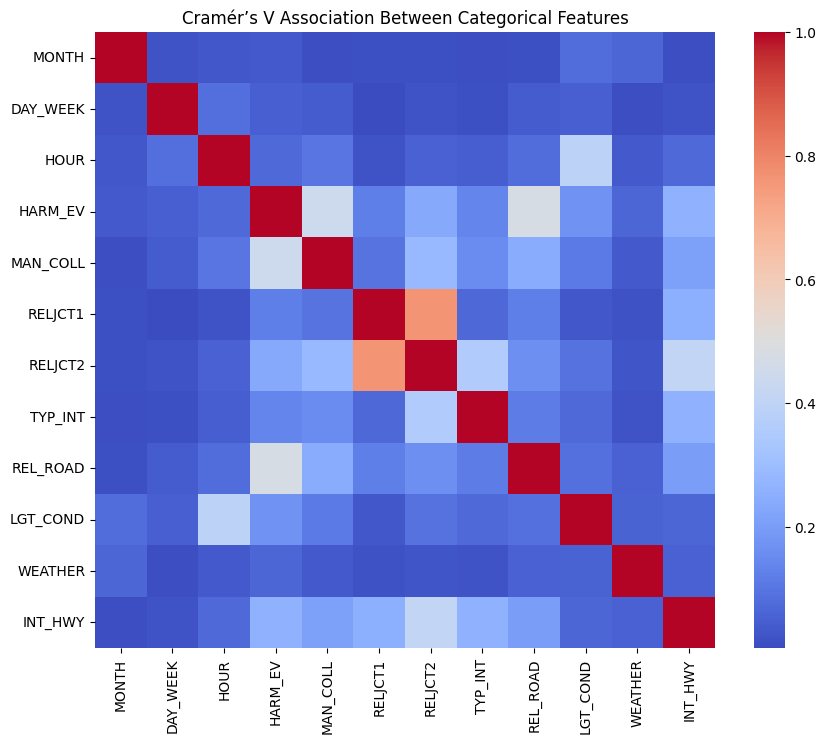

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Compute pairwise Cramér’s V for all categorical features
cat_cols = X_train.columns
cramers = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers.loc[col1, col2] = 1.0
        else:
            cramers.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])

cramers = cramers.astype(float)

# 🔍 visualize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cramers, cmap="coolwarm", annot=False)
plt.title("Cramér’s V Association Between Categorical Features")
plt.show()



In [51]:
#drop high correlated column
df = df.drop(columns='RELJCT1')

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier(max_depth=10, min_samples_split= 200, random_state=RANDOM_STATE)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.5202587006074884
              precision    recall  f1-score   support

           0       0.54      0.98      0.69     43609
           1       0.34      0.03      0.06     20480
           2       0.44      0.22      0.30     15417
           3       0.34      0.06      0.11     10156
           4       0.36      0.03      0.06      2027

    accuracy                           0.52     91689
   macro avg       0.40      0.27      0.24     91689
weighted avg       0.45      0.52      0.41     91689



In [53]:
# --- 1️⃣ Create binary target variable ---
# Map severity 0,1,2 -> 0 (low), and 3,4 -> 1 (high)
y = df['MAX_SEV'].astype(int).replace({0:0, 1:0, 2:0, 3:1, 4:1})

# --- 2️⃣ Prepare features ---
X = df.drop(columns=['MAX_SEV'])
# --- 3️⃣ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# --- 4️⃣ Train the Decision Tree ---
dt = DecisionTreeClassifier(max_depth=45, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

# --- 5️⃣ Evaluate ---
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Low (0–2)', 'High (3–4)']))


Decision Tree Accuracy: 0.7362497137061152
              precision    recall  f1-score   support

   Low (0–2)       0.88      0.80      0.84     79506
  High (3–4)       0.20      0.32      0.24     12183

    accuracy                           0.74     91689
   macro avg       0.54      0.56      0.54     91689
weighted avg       0.79      0.74      0.76     91689



In [55]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# X_train, X_test, y_train, y_test already created earlier
print("Original train distribution:", Counter(y_train))

# --- 1️⃣ Oversample only the training set ---
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("After oversampling:", Counter(y_train_res))

# --- 2️⃣ Train the Decision Tree on resampled data ---
dt = DecisionTreeClassifier(
    max_depth=45,
    min_samples_split=500,
    # you can try WITHOUT class_weight when you oversample:
    # class_weight=None,
    class_weight='balanced',
    random_state=RANDOM_STATE
)
dt.fit(X_train_res, y_train_res)

# --- 3️⃣ Evaluate on the untouched test set ---
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Low (0–2)', 'High (3–4)']))


Original train distribution: Counter({0: 185512, 1: 28428})
After oversampling: Counter({0: 185512, 1: 185512})
Decision Tree Accuracy: 0.6668520760396558
              precision    recall  f1-score   support

   Low (0–2)       0.93      0.67      0.78     79506
  High (3–4)       0.23      0.65      0.34     12183

    accuracy                           0.67     91689
   macro avg       0.58      0.66      0.56     91689
weighted avg       0.83      0.67      0.72     91689



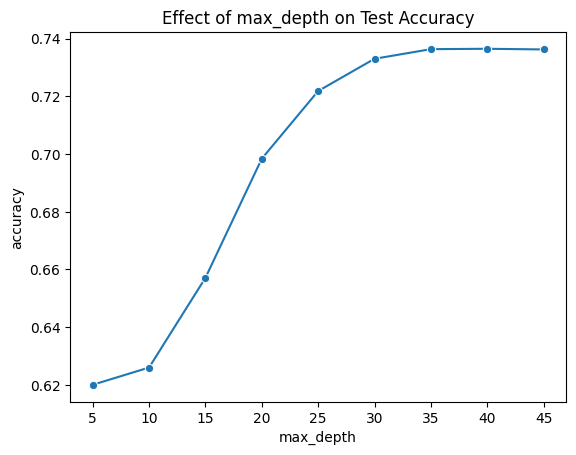

In [56]:
depths = range(5,50,5)
acc = []
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=RANDOM_STATE)
    dt.fit(X_train,y_train)
    acc.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_depth = pd.DataFrame({
    "max_depth": depths,
    "accuracy": acc
})
sns.lineplot(data=df_depth, x="max_depth", y="accuracy", marker="o")
plt.title("Effect of max_depth on Test Accuracy")
plt.show()

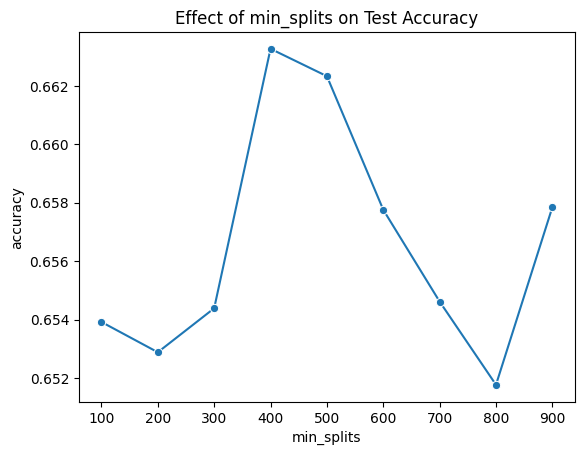

In [57]:
min_splits = range(100,1000,100)
acc2 = []
for i in min_splits:
    dt = DecisionTreeClassifier(max_depth=500,min_samples_split=i, class_weight= 'balanced',random_state=42)
    dt.fit(X_train,y_train)
    acc2.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_split = pd.DataFrame({
    "min_splits": min_splits,
    "accuracy": acc2
})
sns.lineplot(data=df_split, x="min_splits", y="accuracy", marker="o")
plt.title("Effect of min_splits on Test Accuracy")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# --- 4️⃣ Train the Decision Tree ---
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=300, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

# --- 5️⃣ Evaluate ---
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Low (0–2)', 'High (3–4)']))
""" importances = clf_final.feature_importances_
fi = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(fi.head(15).to_string(index=False))

# === Optional: Plot ===
plt.figure(figsize=(8,5))
plt.barh(fi['Feature'][:15][::-1], fi['Importance'][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances — Decision Tree")
plt.grid(alpha=0.3)
plt.show() """

Decision Tree Accuracy: 0.6199980368419331
              precision    recall  f1-score   support

   Low (0–2)       0.93      0.60      0.73     79506
  High (3–4)       0.22      0.73      0.34     12183

    accuracy                           0.62     91689
   macro avg       0.58      0.66      0.54     91689
weighted avg       0.84      0.62      0.68     91689



NameError: name 'clf_final' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# --- Define model ---
rf = RandomForestClassifier(
    n_estimators=500,        # number of trees
    max_depth=None,          # let trees grow fully
    min_samples_split=10,    # control overfitting
    min_samples_leaf=2,
    class_weight='balanced', # handle class imbalance
    random_state=RANDOM_STATE,
    n_jobs=-1                # use all cores
)

# --- Define 5-fold cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Run cross-validation ---
scores = cross_validate(
    rf, X, y,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1,
    return_train_score=False
)

# --- Summarize results ---
print("===== 5-Fold Cross-Validation Results =====")
print(f"Mean Accuracy: {np.mean(scores['test_accuracy']):.3f} ± {np.std(scores['test_accuracy']):.3f}")
print(f"Mean Precision: {np.mean(scores['test_precision']):.3f} ± {np.std(scores['test_precision']):.3f}")
print(f"Mean Recall: {np.mean(scores['test_recall']):.3f} ± {np.std(scores['test_recall']):.3f}")
print(f"Mean F1-score: {np.mean(scores['test_f1']):.3f} ± {np.std(scores['test_f1']):.3f}")

# Optional: see all fold-by-fold results
import pandas as pd
cv_results = pd.DataFrame(scores)
print("\nPer-fold metrics:\n", cv_results[['test_accuracy', 'test_recall', 'test_f1']])


===== 5-Fold Cross-Validation Results =====
Mean Accuracy: 0.775 ± 0.001
Mean Precision: 0.273 ± 0.003
Mean Recall: 0.418 ± 0.007
Mean F1-score: 0.330 ± 0.004

Per-fold metrics:
    test_accuracy  test_recall   test_f1
0       0.774744     0.411794  0.326995
1       0.774417     0.429451  0.335950
2       0.775153     0.412214  0.327593
3       0.772993     0.415784  0.327387
4       0.776949     0.419970  0.333496


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# --- Split data into train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Define and train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# --- Predict on test data ---
y_pred = rf.predict(X_test)

# --- Evaluate ---
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec  = recall_score(y_test, y_pred, average='macro')
f1   = f1_score(y_test, y_pred, average='macro')

print("===== Random Forest Performance (70/30 Split) =====")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



===== Random Forest Performance (70/30 Split) =====
Accuracy: 0.776
Precision: 0.587
Recall: 0.621
F1-score: 0.597

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87     79506
           1       0.27      0.41      0.33     12183

    accuracy                           0.78     91689
   macro avg       0.59      0.62      0.60     91689
weighted avg       0.82      0.78      0.79     91689



In [ ]:

y_proba = rf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.1, 0.9, 9)

print("Thresh | Precision | Recall | F1")
print("---------------------------------")
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    prec_t = precision_score(y_test, y_pred_t, zero_division=0)
    rec_t  = recall_score(y_test, y_pred_t, zero_division=0)
    f1_t   = f1_score(y_test, y_pred_t, zero_division=0)
    print(f"{t:6.2f} |   {prec_t:7.3f} | {rec_t:6.3f} | {f1_t:5.3f}")


Thresh | Precision | Recall | F1
---------------------------------
  0.10 |     0.159 |  0.924 | 0.271
  0.20 |     0.183 |  0.835 | 0.300
  0.30 |     0.207 |  0.718 | 0.322
  0.40 |     0.239 |  0.577 | 0.338
  0.50 |     0.273 |  0.410 | 0.328
  0.60 |     0.322 |  0.258 | 0.286
  0.70 |     0.400 |  0.136 | 0.203
  0.80 |     0.494 |  0.056 | 0.101
  0.90 |     0.612 |  0.008 | 0.015


In [ ]:
#Apply your model here
#X is the dataset and y is the label(binary label) if you want to predict multiple classes, filter it out from our original dataframe df
